#### Проект 6

#  Анализ эффективности маркетинга  Procrastinate Pro+

### Описание проекта: 
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Задача — разобраться в причинах и помочь компании выйти в плюс.

### Описание данных:
В вашем распоряжении три датасета. 
1. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
2. orders_info_short.csv — информацию о заказах, а 
3. costs_info_short.csv — информацию о расходах на рекламу.

#### Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

#### Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

#### Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

## 1. Загрузка и подготовка данных к анализу

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np


In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [6]:
visits.duplicated().sum()

0

In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [10]:
orders.duplicated().sum()

0

In [11]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [14]:
costs.duplicated().sum()

0

#### Приведем названия колонок к нижнему регистру:

In [15]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
display(list(visits.columns))
display(list(orders.columns))
list(costs.columns)

['user id', 'region', 'device', 'channel', 'session start', 'session end']

['user id', 'event dt', 'revenue']

['dt', 'channel', 'costs']

#### Переименуем названия колонок чтобы подходили для функций из тренажера: 

In [16]:
visits = visits.rename({'user id': 'user_id','session start':'session_start'}, axis='columns')
orders = orders.rename({'user id': 'user_id','event dt':'event_dt'},axis='columns')
display(list(visits.columns))
display(list(orders.columns))
list(costs.columns)

['user_id', 'region', 'device', 'channel', 'session_start', 'session end']

['user_id', 'event_dt', 'revenue']

['dt', 'channel', 'costs']

#### Преобразуем типы с столбцах с датами:


In [17]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session end']=pd.to_datetime(visits['session end'])

orders['event_dt']=pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### По результатам подготовки данных: 
1. В 1 части задания прочитано 3 файла.
2. Дубликатов и пропусков не выявлено
3. Названия колонок скорректированы для последующего применения функций
4. Столбцы с данными о времени преобразованы из object в datetime


## 2. Подготовка функций для расчёта и анализа LTV, ROI, RR и CR.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания профилей пользователей:

In [18]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename({'session_start': 'first_ts'},axis='columns')
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt','channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

### Функция для расчета удержания:

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],  # параметр для группировки таблицы удержания
    ignore_horizon=False,
):

    # --- получаем сырые данные и таблицу удержания ---

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=dimensions,
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(
        result_grouped['cohort_size'], axis=0
    )#.drop(columns=['cohort_size'])

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # --- создаём таблицу динамики удержания ---

    # добавляем даты привлечения в параметр dimensions
    dimensions = ['dt'] + dimensions

    # рассчитываем удержание
    result_in_time = result_raw.pivot_table(
        index=dimensions,
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_in_time = cohort_sizes.merge(
        result_in_time, on=dimensions, how='left'
    ).fillna(0)
    result_in_time = result_in_time.div(
        result_in_time['cohort_size'], axis=0
    )#.drop(columns=['cohort_size'])

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_in_time = result_in_time[
        ['cohort_size'] + list(range(horizon_days))
    ]
    # восстанавливаем столбец с размерами когорт
    result_in_time['cohort_size'] = cohort_sizes

    # возвращаем сырые данные, таблицу удержания и таблицу динамики удержания
    return result_raw, result_grouped, result_in_time

### Функция для расчета конверсиий:

In [20]:
def get_conversion(
    profiles,
    purchases,  # заменили sessions
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета LTV:

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания данных:

In [22]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для построения графиков удержания Retention Rate:

In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для построения графиков Конверсии :

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для построения графиков LTV и ROI:

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных

- Определим минимальную и максимальную даты привлечения пользователей.
- Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.  Смотрим количество пользователей и долю платящих из каждой страны.
- Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучаем рекламные источники привлечения и определяем каналы, из которых пришло больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

### 3.1 Составляем таблицу профилей пользователей:

In [26]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Определяем минимальную и максимальную даты привлечения пользователей:

In [27]:
# Расчёт Retention Rate в Python — практика
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

print('Минимальная дата привлечения пользователей: ', min_analysis_date)
print('Максимальная дата привлечения пользователей: ', observation_date)

Минимальная дата привлечения пользователей:  2019-05-01
Максимальная дата привлечения пользователей:  2019-10-27


### Вывод: 
1го пользователя привлекли 1 мая 2019 года , последнего - 27 октября 2019года. Эта информация была нам доступна еще на этапе задания. Данные подтвердили это.

### 3.2 Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [28]:
profiles.groupby('region').agg({'user_id': 'count','payer' : 'mean' }).sort_values(by='payer', ascending=False).round(3)

,user_id,payer
region,,
United States,100002,0.069
Germany,14981,0.041
UK,17575,0.040
France,17450,0.038


### Выводы: 
#### По кол-ву пришедших пользователей: 
1. США - абсолютный лидер с кол-вом 100тыс. Что в 5 раз больше чем у других стран.
2. Из ЮК и Франции - обинаковое кол-во (по 17.5 тыс) 
3. Меньше всего из Германии (~15тыс.)
#### Доля платящих пользователей: 
1. США - также абсолютный лидер с долей 6.9%
2. Германия на 2м месте с долей 4.1%
3. ЮК 3ий с долей 4%
4. Франция последняя с долей 3.8%

### 3.3  Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [29]:
print('Доля пользователей Apple: ',round((30042+54479)/150008*100),'%')

Доля пользователей Apple:  56 %


In [30]:
profiles.groupby('device').agg({'user_id': 'count','payer' : 'mean' }).sort_values(by='payer', ascending=False).round(3)

,user_id,payer
device,,
Mac,30042,0.064
iPhone,54479,0.062
Android,35032,0.059
PC,30455,0.050


#### Изучаем, какими устройствами пользуются клиенты :

In [31]:
profiles.groupby('device').agg({'user_id' : 'count'}).sort_values(by='user_id', ascending=False)

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


#### Какие устройства предпочитают платящие пользователи:

In [32]:
profiles.query('payer == True').groupby('device').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


### Выводы: 
#### Устройства по кол-ву пользователей: 
1. Iphone 54479 - лидер
2. Android 35032
3. MAC и PC ~ по 30 тыс пользователей

#### Доля платящих пользователей: 
1. Mac, Iphone и Android ~ похожие цифры 6.4, 6.2 и 5.9 % соответственно
2. PC отстает более заметно с долей 5%


### 3.4 Изучаем рекламные источники привлечения. 

#### Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [33]:
print('Кол-во пользователей из всех каналов кроме organic:',(150008- 56439))
print('Доля пользователей из каналов FaceBoom и TipTop',round((29144+19561)/93569*100),'%')

Кол-во пользователей из всех каналов кроме organic: 93569
Доля пользователей из каналов FaceBoom и TipTop 52 %


In [34]:
profiles.groupby('channel').agg({'user_id': 'count','payer' : 'mean' }).sort_values(by='payer', ascending=False).round(3)

,user_id,payer
channel,,
FaceBoom,29144,0.122
AdNonSense,3880,0.113
lambdaMediaAds,2149,0.105
TipTop,19561,0.096
RocketSuperAds,4448,0.079
WahooNetBanner,8553,0.053
YRabbit,4312,0.038
MediaTornado,4364,0.036
LeapBob,8553,0.031


#### Определяем каналы, из которых пришло больше всего платящих пользователей:

In [35]:
profiles.groupby('channel').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


### Выводы: 
#### Каналы по ко-ву пользователей: 
1. Органический трафик - абсолютный лидер с 2х кратным отрывом от 2го места
2. FaceBoom	 29144  
3. TipTop 19561
4. Остальные 8 каналов с показателями от 8,6 до 2,1 тыс пользователей соответственно значительно отстают

#### Каналы по доле платящих:
1. FaceBoom , AdNonSense и  lambdaMediaAds перешагнули доля в 10% имея значения 12.2, 11.3 и 10.5% соотв.
2. TipTop и RocketSuperAds тоже показали неплохие результаты с 9.6 и 7.9 % соотв.
3. Остальные каналы привлекла намного меньше : от 5.3 до 2.7 % 
4. Органический трафик - ХУДЬШИЙ !!! с долей платящих всего 2.1%

## 4. Маркетинг

- Считаем общую сумму расходов на маркетинг.
- Выясняем, как траты распределены по рекламным источникам (сколько денег потратили на каждый источник).
- Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Выясняем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника (исп. профили пользователей)

In [36]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### 4.1 Общая сумма расходов на маркетинг:

In [37]:
total_costs = costs['costs'].sum().round(1)
print ("Общая сумма расходов на маркетинг:",total_costs)

Общая сумма расходов на маркетинг: 105497.3


### 4.2 Cколько денег потратили на каждый источник.

In [38]:
print('Доля от отщей суммы потраченная на каналы TipTop и FaceBoom:',round((54751.3+32445.6)/105497.3*100,2),'%')

Доля от отщей суммы потраченная на каналы TipTop и FaceBoom: 82.65 %


In [39]:
channel_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
channel_costs['share'] = channel_costs['costs'] / total_costs
channel_costs

,costs,share
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


### Вывод: 
1. Самые большие расходы на TipTop и FaceBoom 54751 и 32445 соотв. На них потрачено ~ 80% всего маркетингового бюджета
2. Оставшиеся 20 %  - расходы на остальные компании, в диапазоне 5151 - 944 

### 4.3 Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику:

#### Добавим в таблицу costs 2 новых столбца: с номером недели и месяца.

In [40]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_week'] = costs['dt'].dt.isocalendar().week
costs['costs_month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,costs_week,costs_month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


#### Таблица  расходов по неделям: 

In [41]:
wk_ch_costs = costs.pivot_table(
    index='costs_week', columns='channel', values='costs', aggfunc='sum'
)

#### Таблица  расходов по месяцам: 

In [42]:
mth_ch_costs = costs.pivot_table(
    index='costs_month', columns='channel', values='costs', aggfunc='sum'
)

#### Графики расходов по неделям и месяцам:

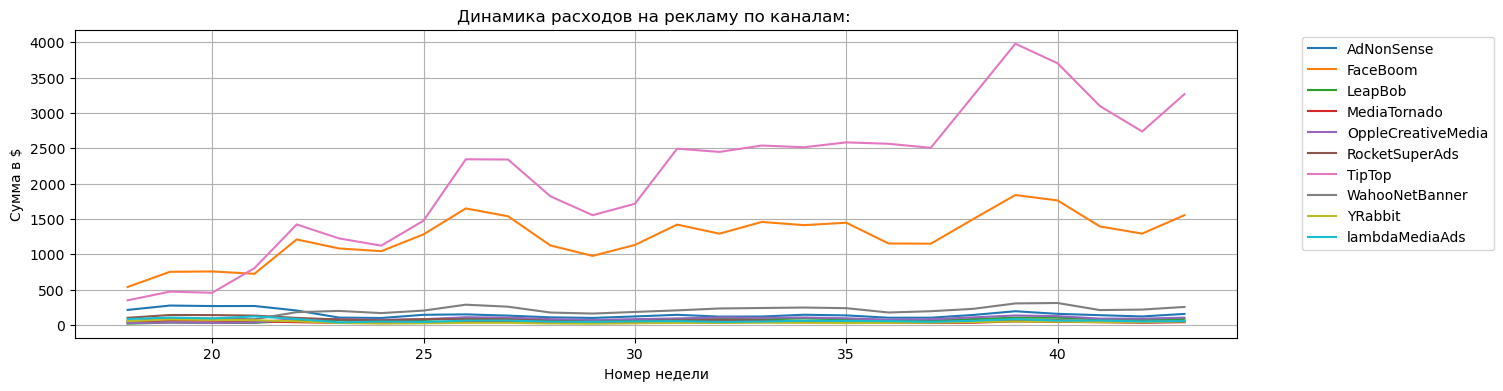

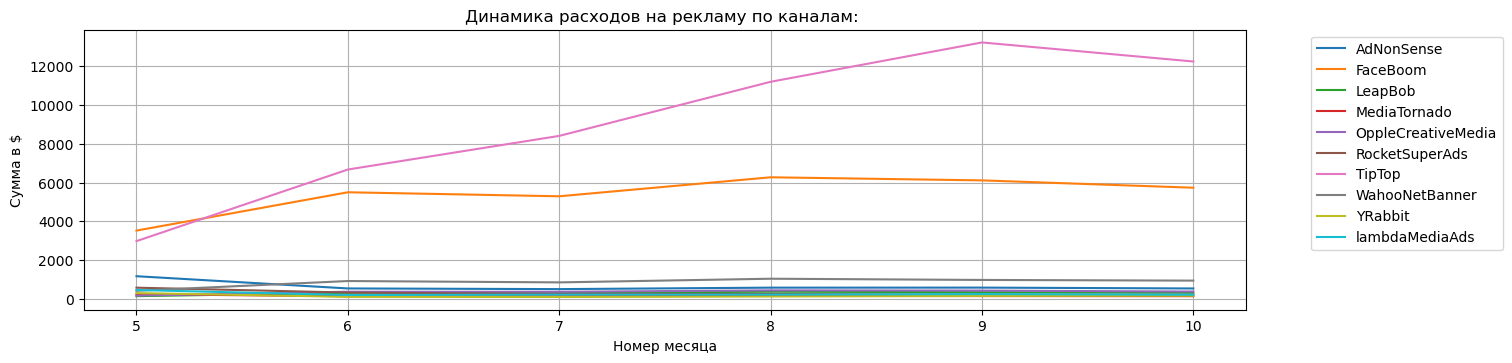

In [43]:
fig, axs = plt.subplots(nrows= 2 , ncols= 1, figsize=(15,4))

wk_ch_costs.plot(grid = True, ax=plt.subplot(1,1,1) )
plt.title('Динамика расходов на рекламу по каналам: ')
plt.xlabel('Номер недели')
plt.ylabel('Сумма в $')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

mth_ch_costs.plot(grid = True, figsize=(15,8), ax=plt.subplot(2,1,1) )
plt.title('Динамика расходов на рекламу по каналам: ')
plt.xlabel('Номер месяца')
plt.ylabel('Сумма в $')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Вывод: 
 Суммы на графиках по неделям и по месяцам - разных порядков, не очень понял зачем делать их на 1м графике?!
1. Расходы на рекламу через TipTop и FaceBoom постоянно росли
2. В то время как расходы остальных компаний были достаточно стабильны 

### 4.4 Cколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника:

#### Уберем из профайлов органический трафик: 

In [44]:
profiles = profiles.query('channel != "organic"')

In [45]:
print('Во сколько раз дороже пользователь самого дорогого канала, по сравнению с самым недорогим:',round((2.8/0.21),1))

Во сколько раз дороже пользователь самого дорогого канала, по сравнению с самым недорогим: 13.3


In [46]:
print("Средняя стоимость привлечения 1го пользователя:",round(profiles['acquisition_cost'].mean(),1))

Средняя стоимость привлечения 1го пользователя: 1.1


In [47]:
profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


### Вывод: 
Средняя стоимость привлечения 1го пользователя 1.1 . Мы видим очень большую волотильность стоимости по каналам. Пользователи с популярных каналов дороже и постоянно дорожают.

1. Каждый пользователь из TipTop 'ЗОЛОТОЙ' - стоит по 2.8
2. На 2м месте, ожидаемо, пользователь из FaceBoom по цене 1.11 за штуку
3. Есть средняя категория со стоимостью в диапазоне 0.72 -0.25
4. YRabbit,MediaTornado и LeapBob по 2.1


## 5. Оценим окупаемость рекламы

    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Постройтиме графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

#### На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения:

In [48]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

### 5.1 Проанализируем окупаемость рекламы.
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,orders,observation_date,horizon_days
)

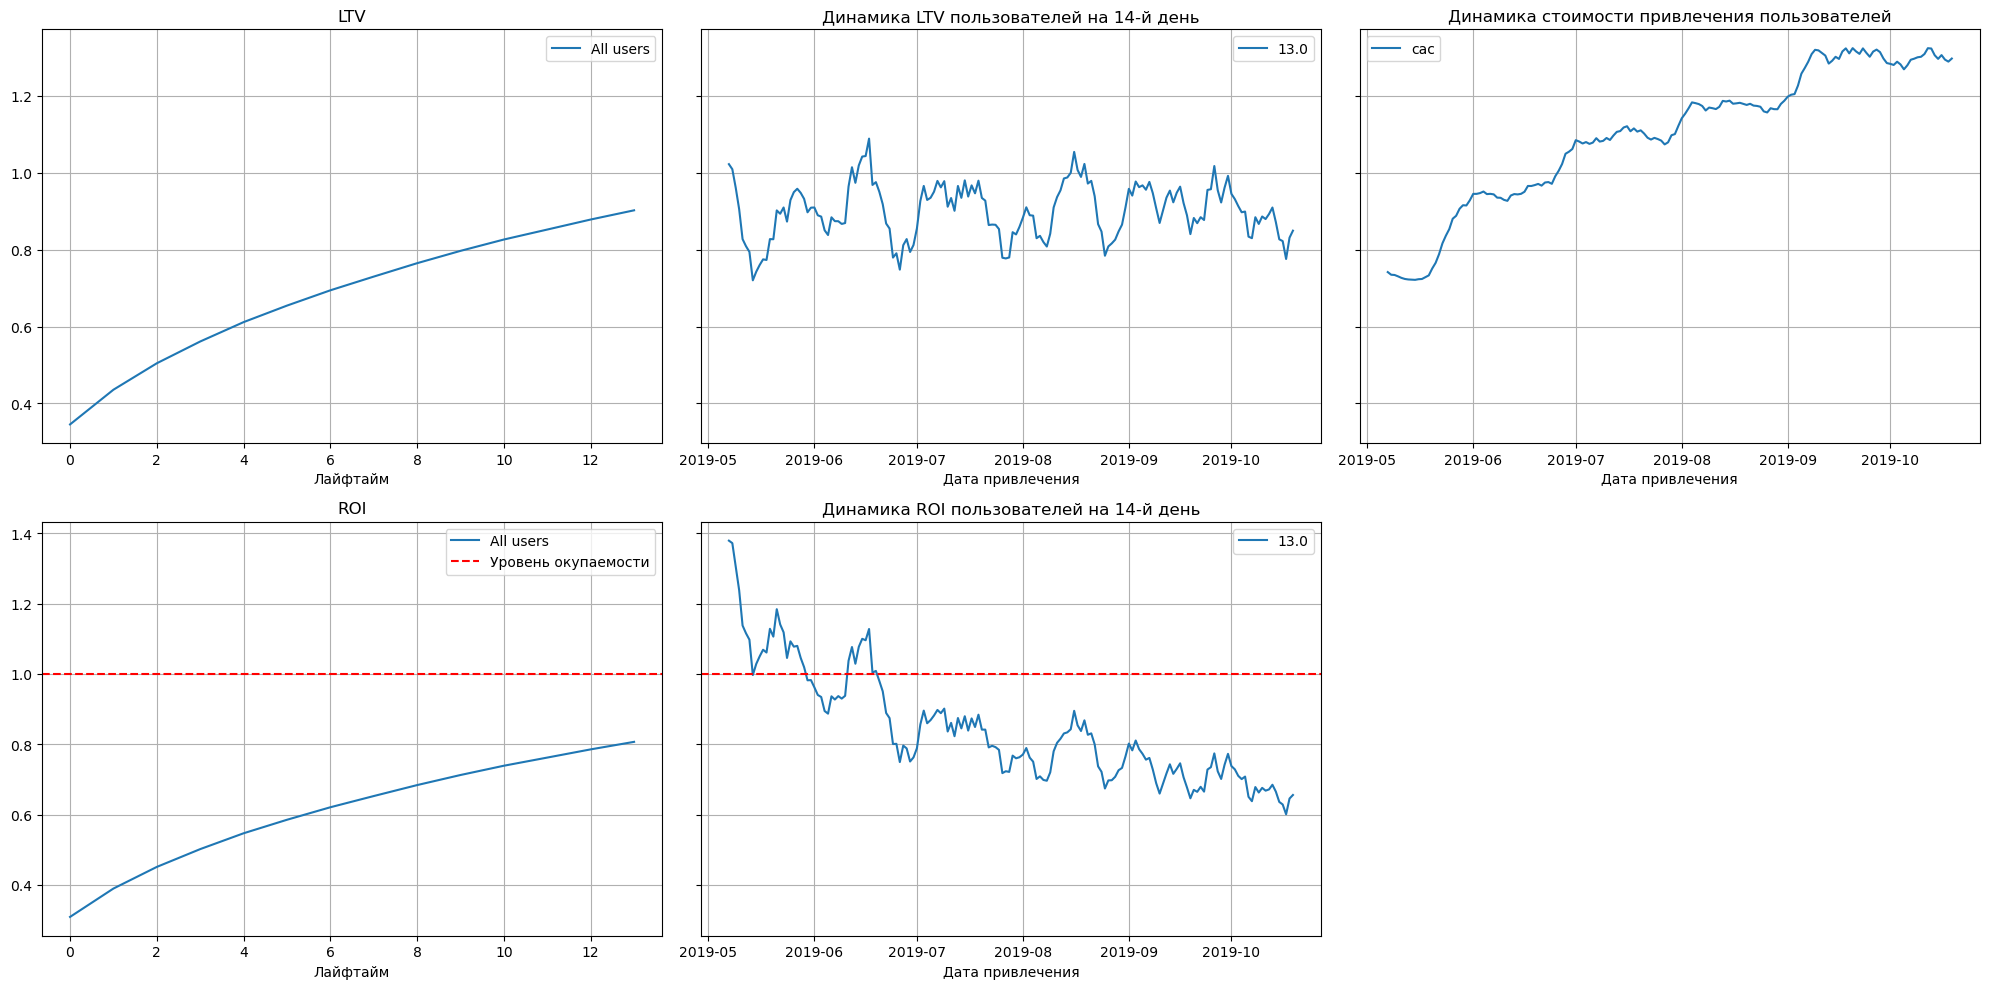

In [50]:
# Используется все кроме сырых данных:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=7)

#### Вывод :  
1. Реклама не окупается. ROI в конце недели — чуть выше 80%
2. Затраты на привлечение CAC постоянно растут
3. Динамика ROI на 14 день постоянно снижается.
4. Динамика LTV на 14 день нестабильна и колеблется от 0.7 до 1.1

Чем дольше компания продолжит так работать, тем больше денег будет терять!

### 5.2 Проверим конверсию пользователей и динамику её изменения.  
Построим и изучим графики конверсии и удержания.

#### Строим графики конверсии:

In [51]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,orders,observation_date,horizon_days
)

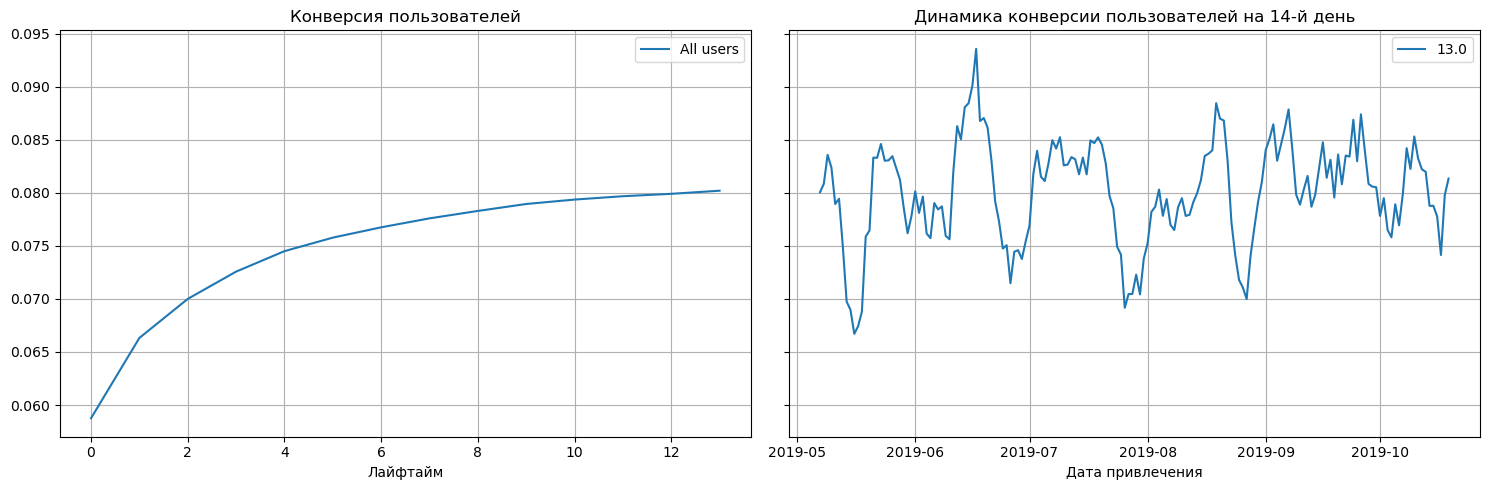

In [52]:
plot_conversion(result_grouped, result_in_time, 14, window=7)

1. Средняя конверсия пользователей **8 %**
2. Динамика конверсии постоянно "скачет" в диапазоне 6.5 - 8.8%
3. Динамика конверсии более-менее стабилизировалась в последние 3 месяца

#### Конверсия по устройствам:

In [53]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,orders,observation_date,horizon_days, dimensions=['device']
)

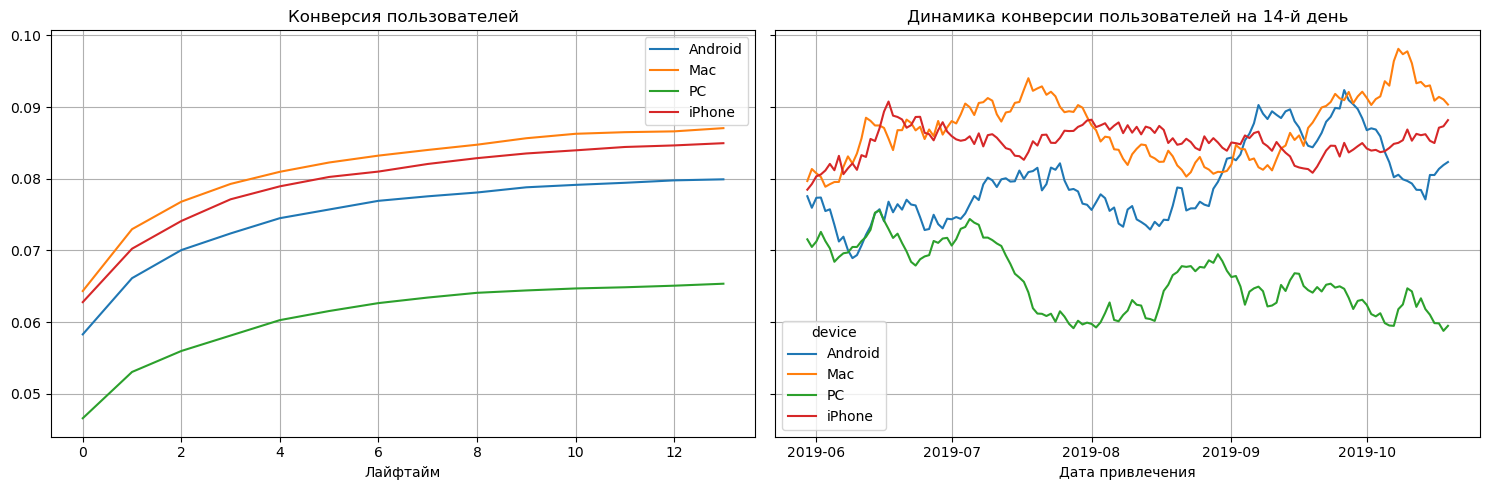

In [54]:
plot_conversion(result_grouped, result_in_time, 14, window=30)

1. Конверсия пользователей Apple выше 0.85. У Android -средняя. Сильно отличается конверсия у пользователей PC 0.65
2. Динамика конверсии у всех достаточно стабильна. У PC заметно небольшое снижение до 0.6.

#### Конверсия по странам:

In [55]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,orders,observation_date,horizon_days, dimensions=['region']
)

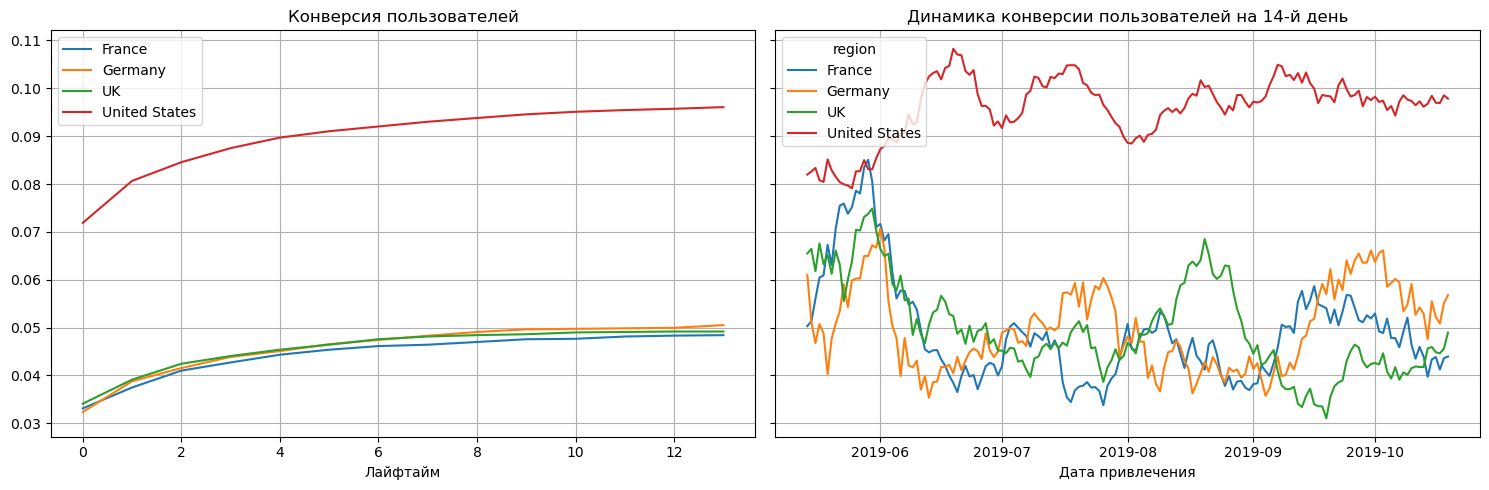

In [56]:
plot_conversion(result_grouped, result_in_time, 14, window=14)

1. Самая высокая конверсия в США 9.6%. Остальные на уровне 5%
2. Динамика конверсии в США самая стабильная. Конверсия остальных волотильна от 3 до 6%.

#### Конверсия по каналам: 

In [57]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,orders,observation_date,horizon_days, dimensions=['channel']
)

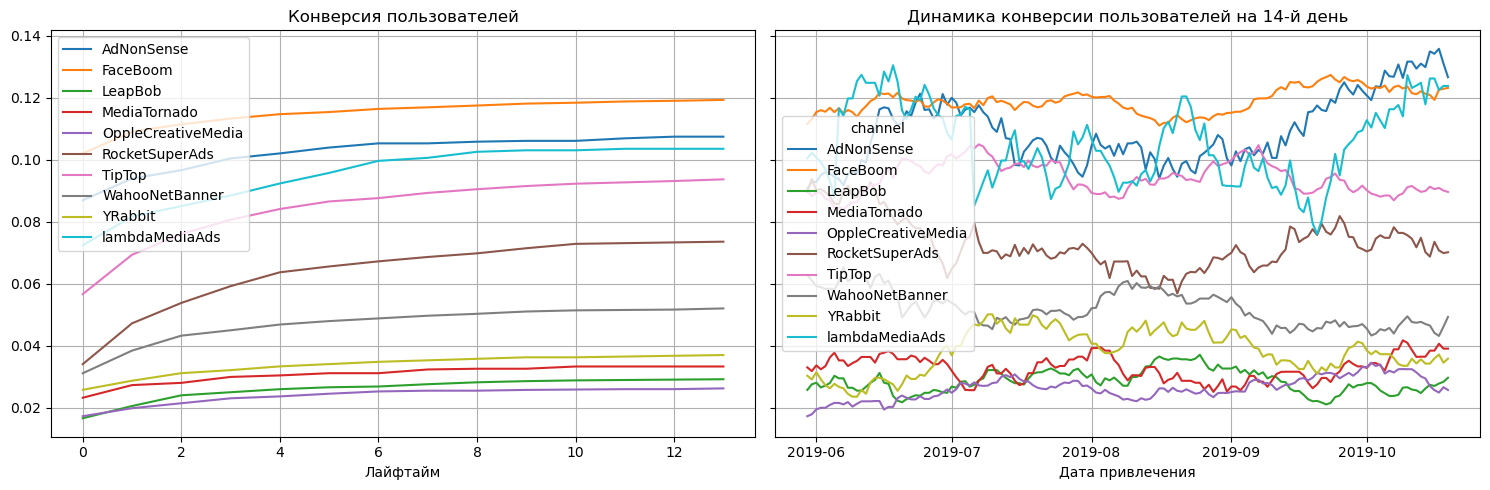

In [58]:
plot_conversion(result_grouped, result_in_time, 14, window=30)

1. Самая высокая конверсия у FaceBoom - 12%
2. Выше среднего : AdNonSense, lambdaMedia и TipTop ~ 10.8,10.5 и 9.2% соотв
3. Чуть ниже среднего Rocket ~ 7.2% 
4. Остальные сильно хуже
5. Динамика конверсии у всех ~ стабильна.

#### Строим графики удержания:

In [59]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles, visits, observation_date, horizon_days
)

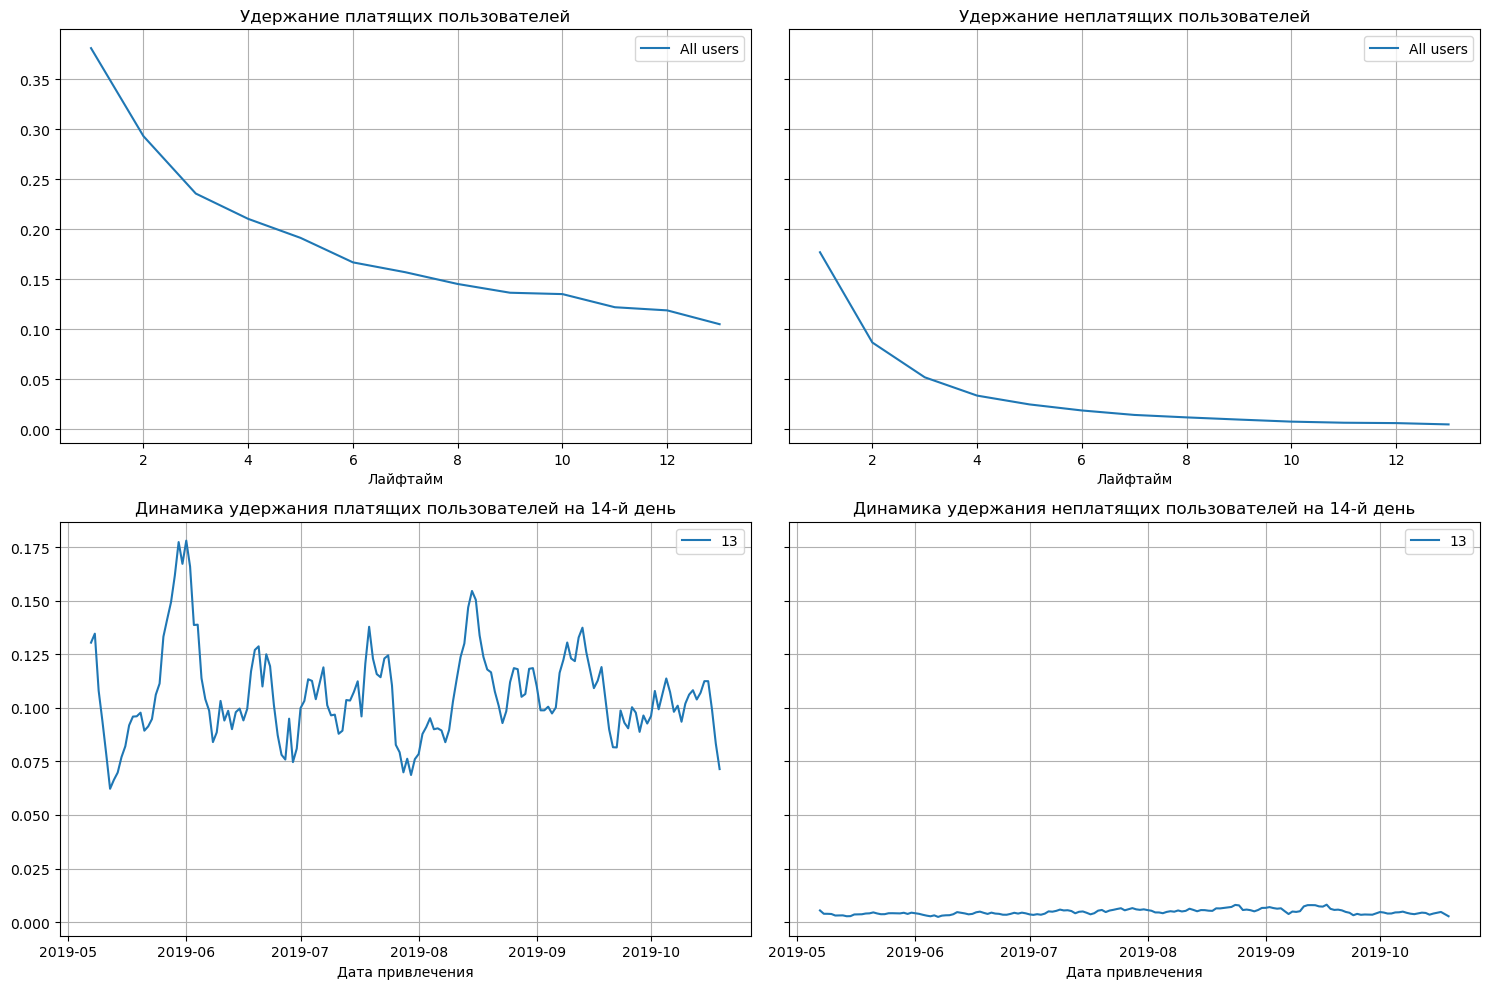

In [60]:
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

1. Удержание платящих снижается от 40 до 12%, а неплатящих от 17 до 1%, причем падает в 5 раз уже через неделю
2. Динамика удержания платящих польз-лей на 14 день постоянно скачет в диапазоне 7.5- 15%, а неплатящих стабильно - отсутствует.

#### Удержание по устройствам:

In [61]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

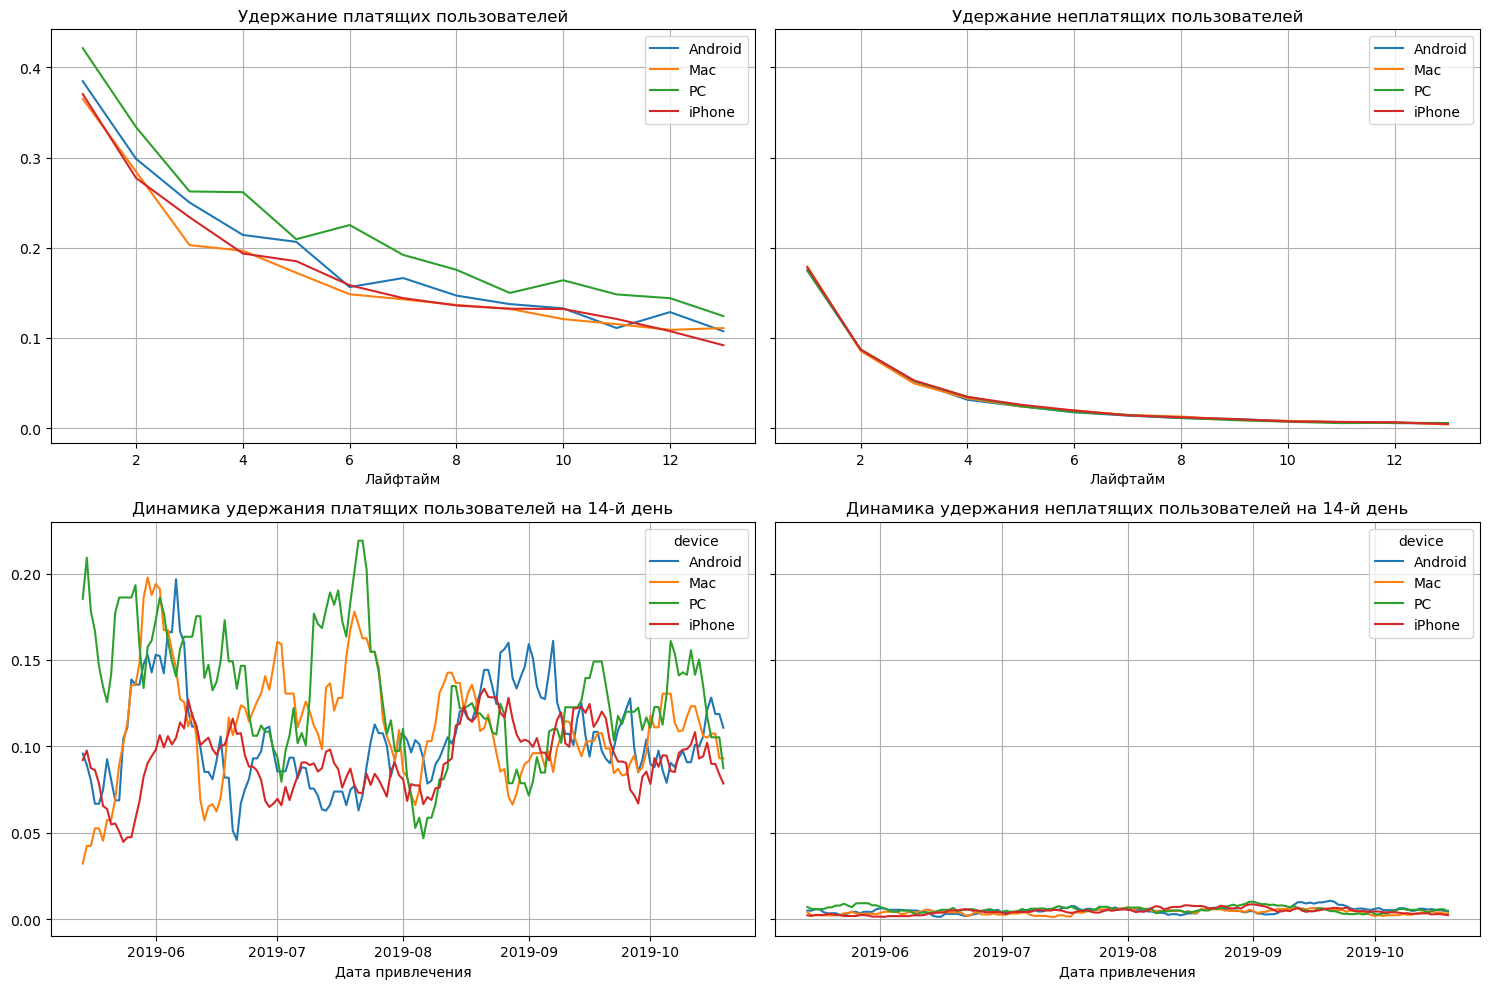

In [62]:
plot_retention(result_grouped, result_in_time, horizon_days, window=14)

1. Удержание у всех устройств примерно одинаковое. Чуть лучше у PC.
2. Динамика удержания аналогично

#### Удержание по странам:

In [63]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

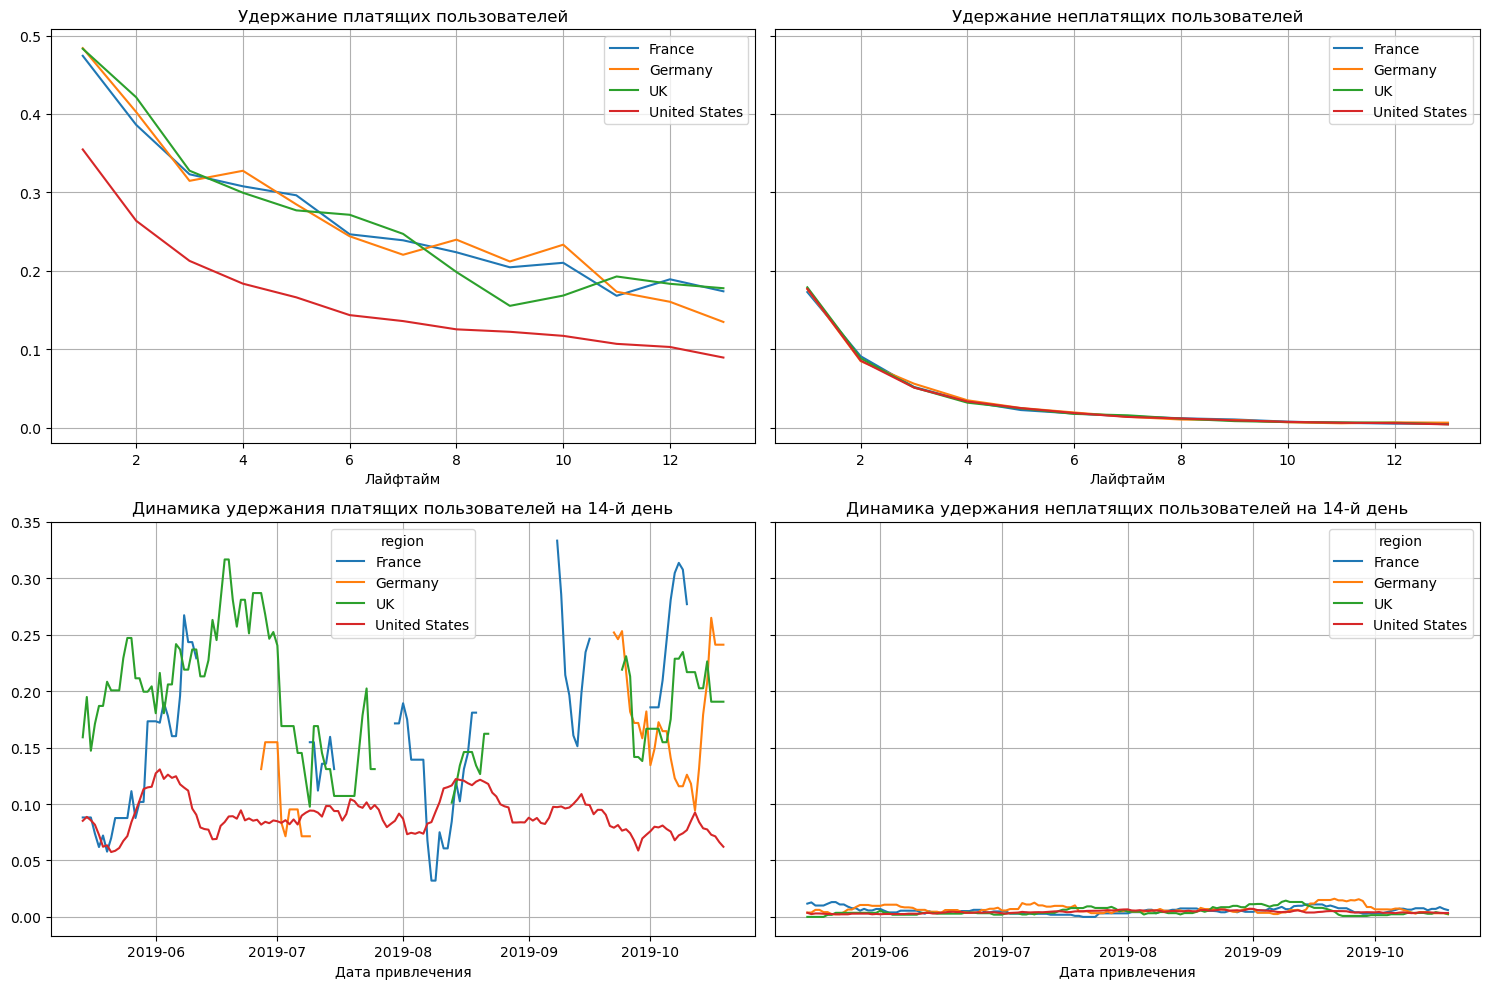

In [64]:
plot_retention(result_grouped, result_in_time, horizon_days, window=14)

1. В Европе удержание примерно на 1м уровне от 0.5 до 0.17. **Хуже всех США с удержанием от 0.38 - 0.11**
2. Динамика удержания у США самая стабильная, у остальных очень волотильная.

#### Удержание по каналам:

In [65]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

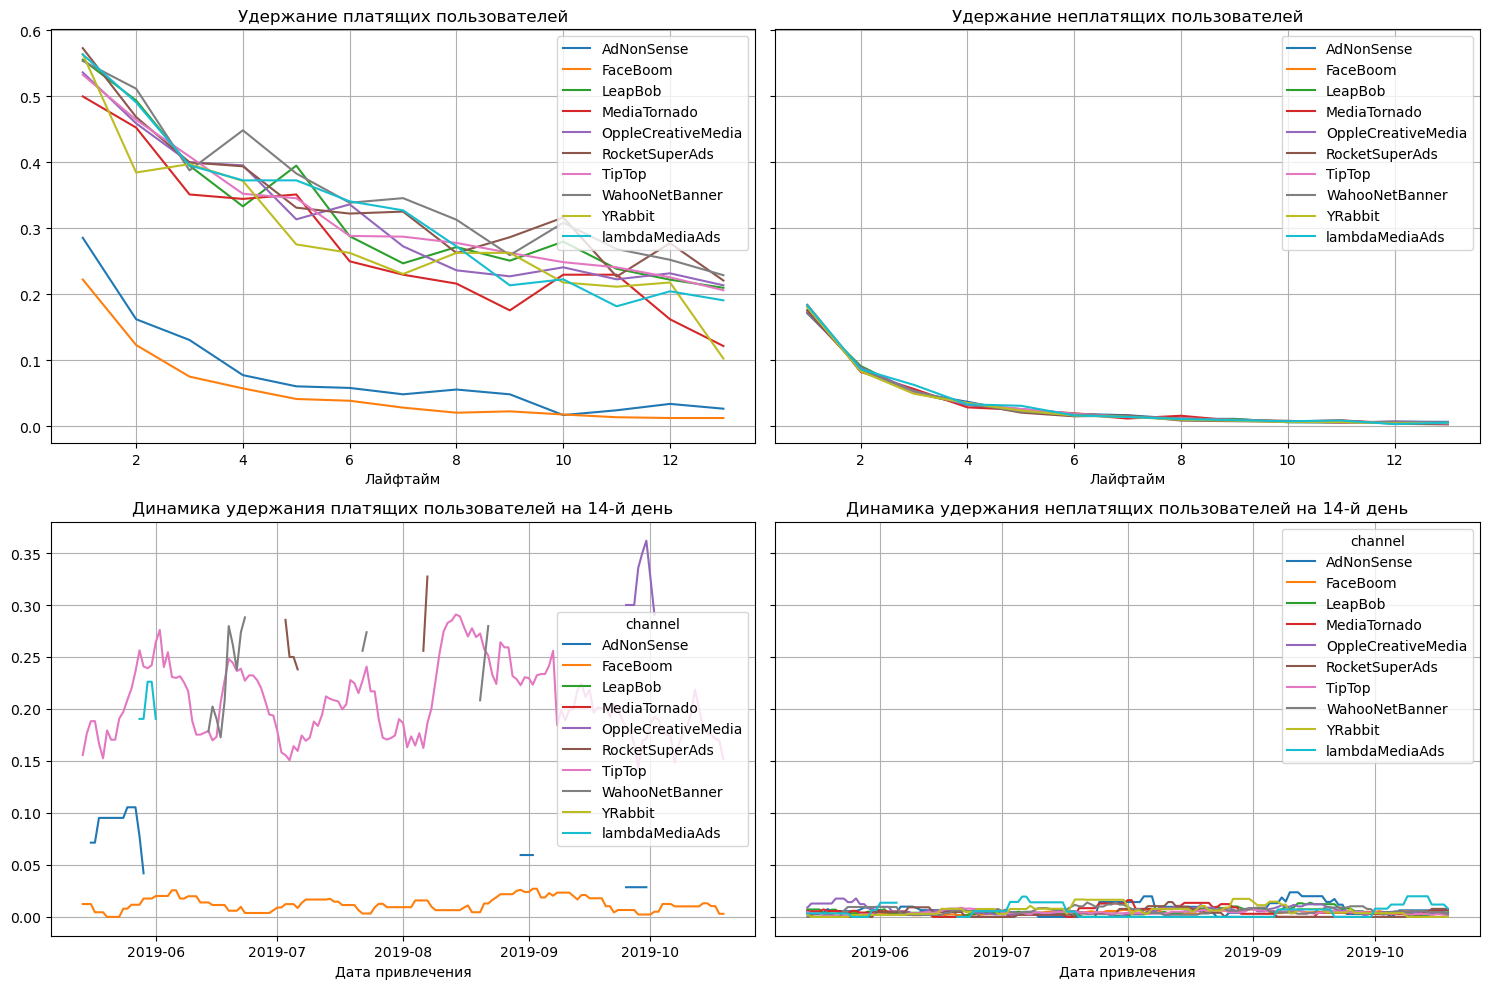

In [66]:
plot_retention(result_grouped, result_in_time, horizon_days, window=14)

1. Удержание по каналам Хуже всех у FaceBoom и Adnonsense - на уровне 2-3%
    - MediaTornado и YRabbit на уровне 10%
    - Остальные стабильно выше 20%
2. Динамика удержания стабильно низкая у FaceBoom
    - нестабильная, но высокая у AdNonSence и TipTop

### 5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. 
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [67]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,orders,observation_date,horizon_days, dimensions=['device']
)

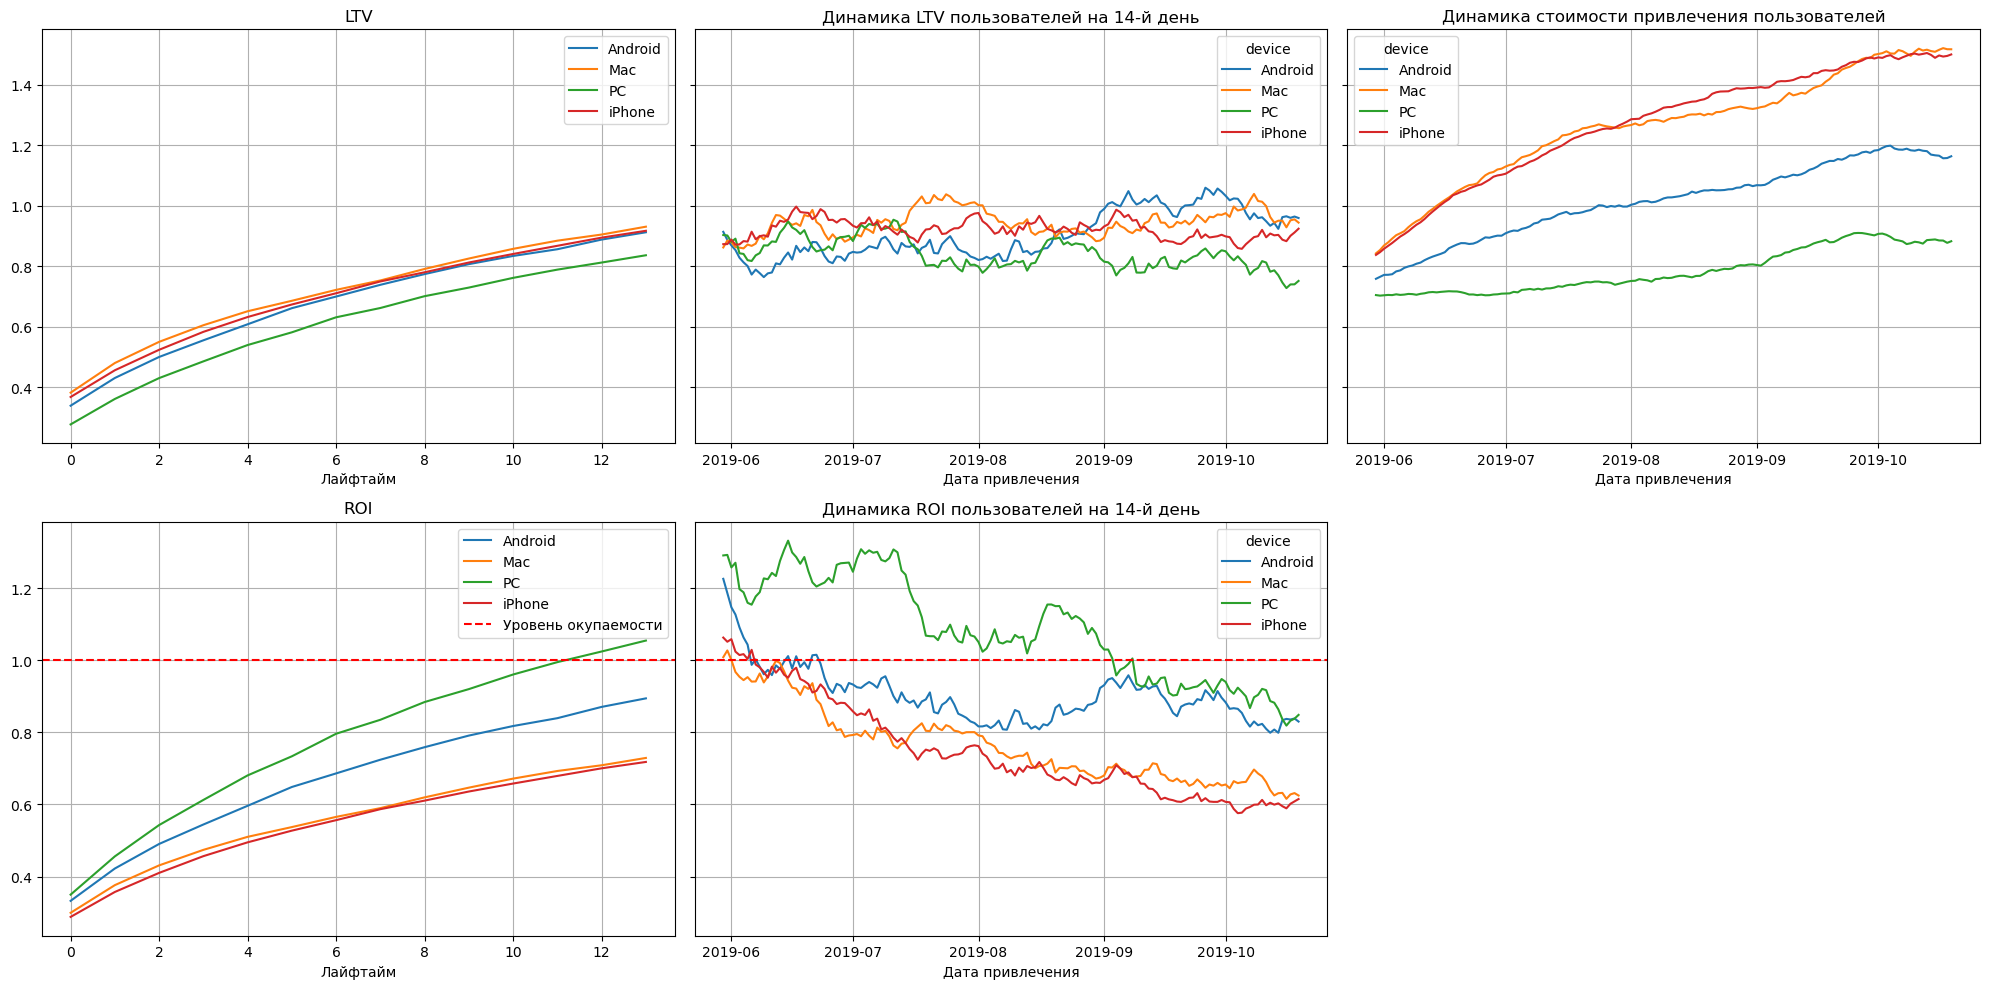

In [68]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=30)

#### Вывод: 
1. Самый низкий LTV у PC,остальные на 1м уровне
2. При этом **PC - удинственные кто окупаются!!!**
3. Динамика LTV у всех примерно одинаковая. Чуть заметнее снижается у PC
4. **Динамика ROI у  всех снижается** и с сентября не окупается даже PC!!!
5. Стоимость привлечения для всех плавно растет, но у Apple она существенно выше. PC - самая низкая, Android - 2ой.

### 5.4 Проанализируем окупаемость рекламы с разбивкой по странам. 
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [69]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,orders,observation_date,horizon_days, dimensions=['region']
)

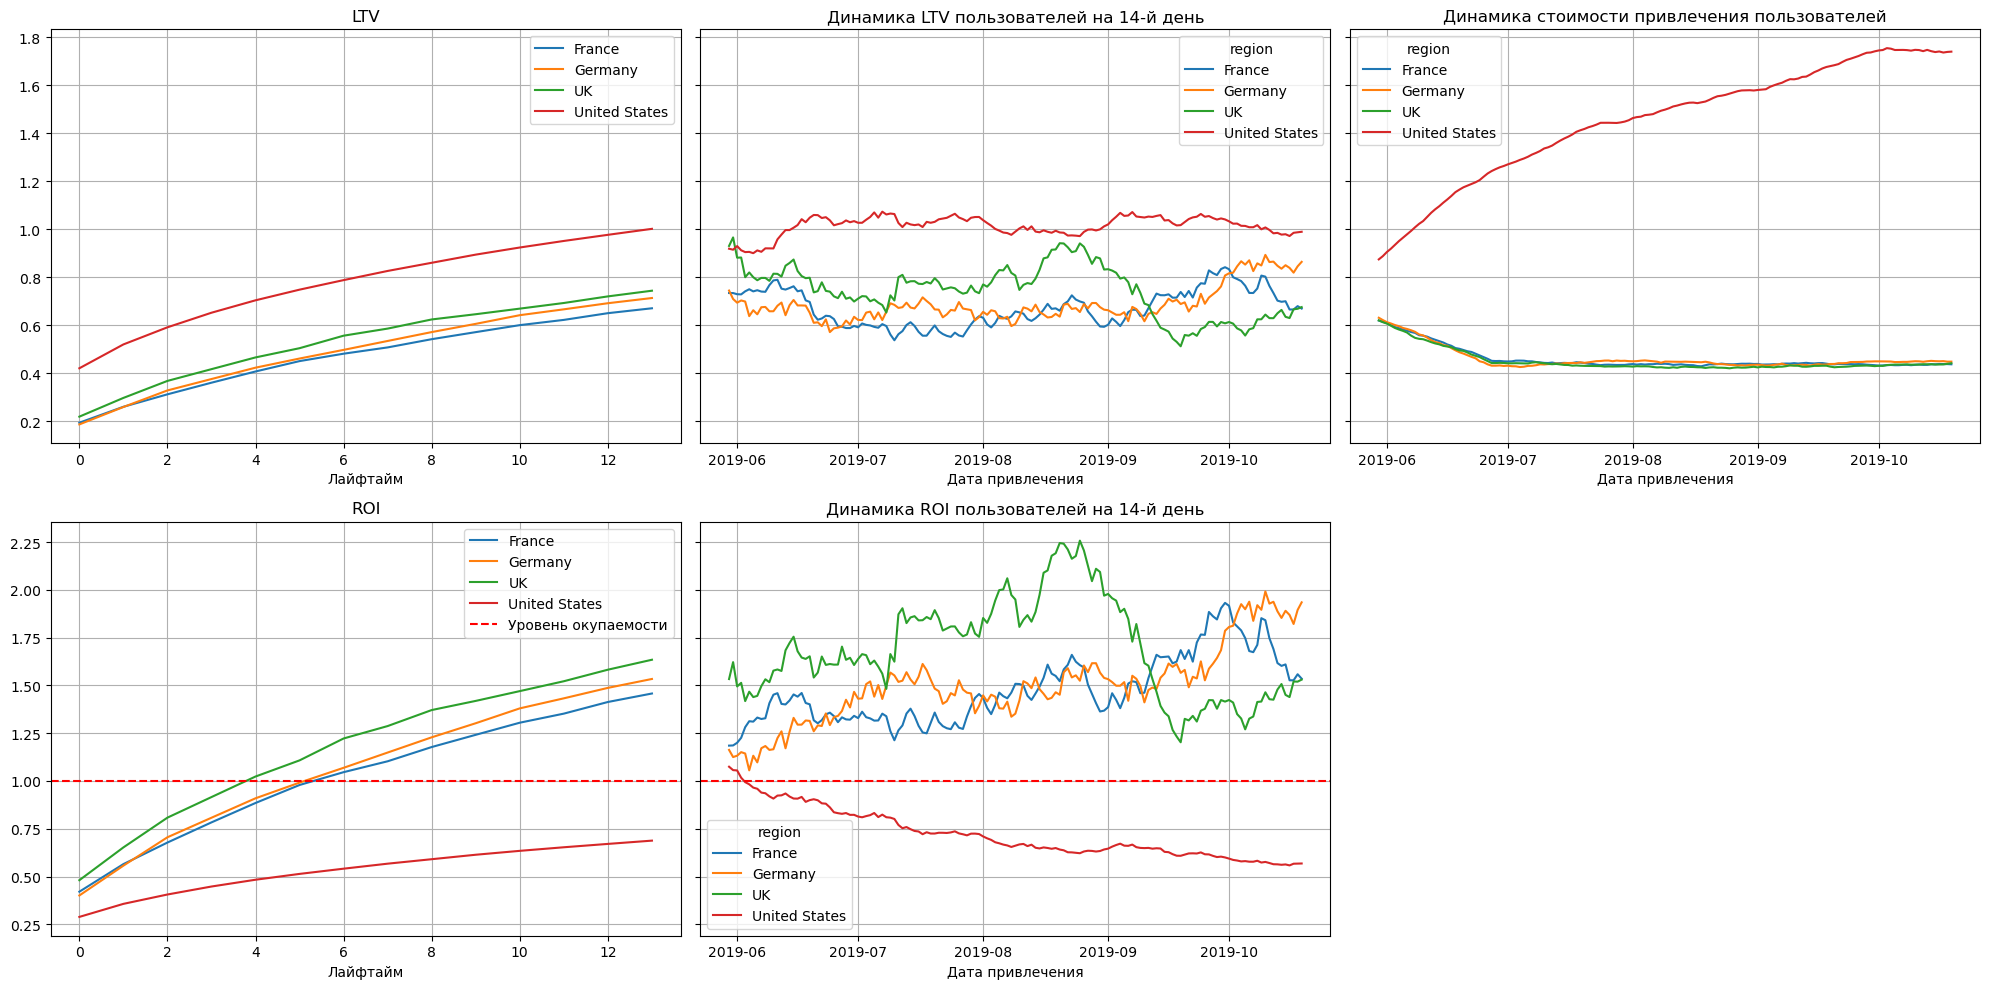

In [70]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=30)

#### Вывод: 
1. Самый высокий LTV у пользователей из США, самый низкий у Франции, ЮК и Германия в середине.
2. При этом пользователи из США вообще НЕ окупаются, в отличие от остальных.
3. Динамика ROI США упала ниже уровня окупаемости в конце июня. У остальных стабильно выше уровня окупаемости.
4. Динамика стоимости привлечения в США значительно выросла в конце июня, у остальных она стабильная.

#### Посмотрим отдельно на США:

In [71]:
profiles.usa = profiles.query('region == "United States"')

C:\Users\ivans\AppData\Local\Temp\ipykernel_6444\2630776050.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  profiles.usa = profiles.query('region == "United States"')


In [72]:
# Группировка по устройствам пользователей:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles.usa,orders,observation_date,horizon_days, dimensions=['device']
)

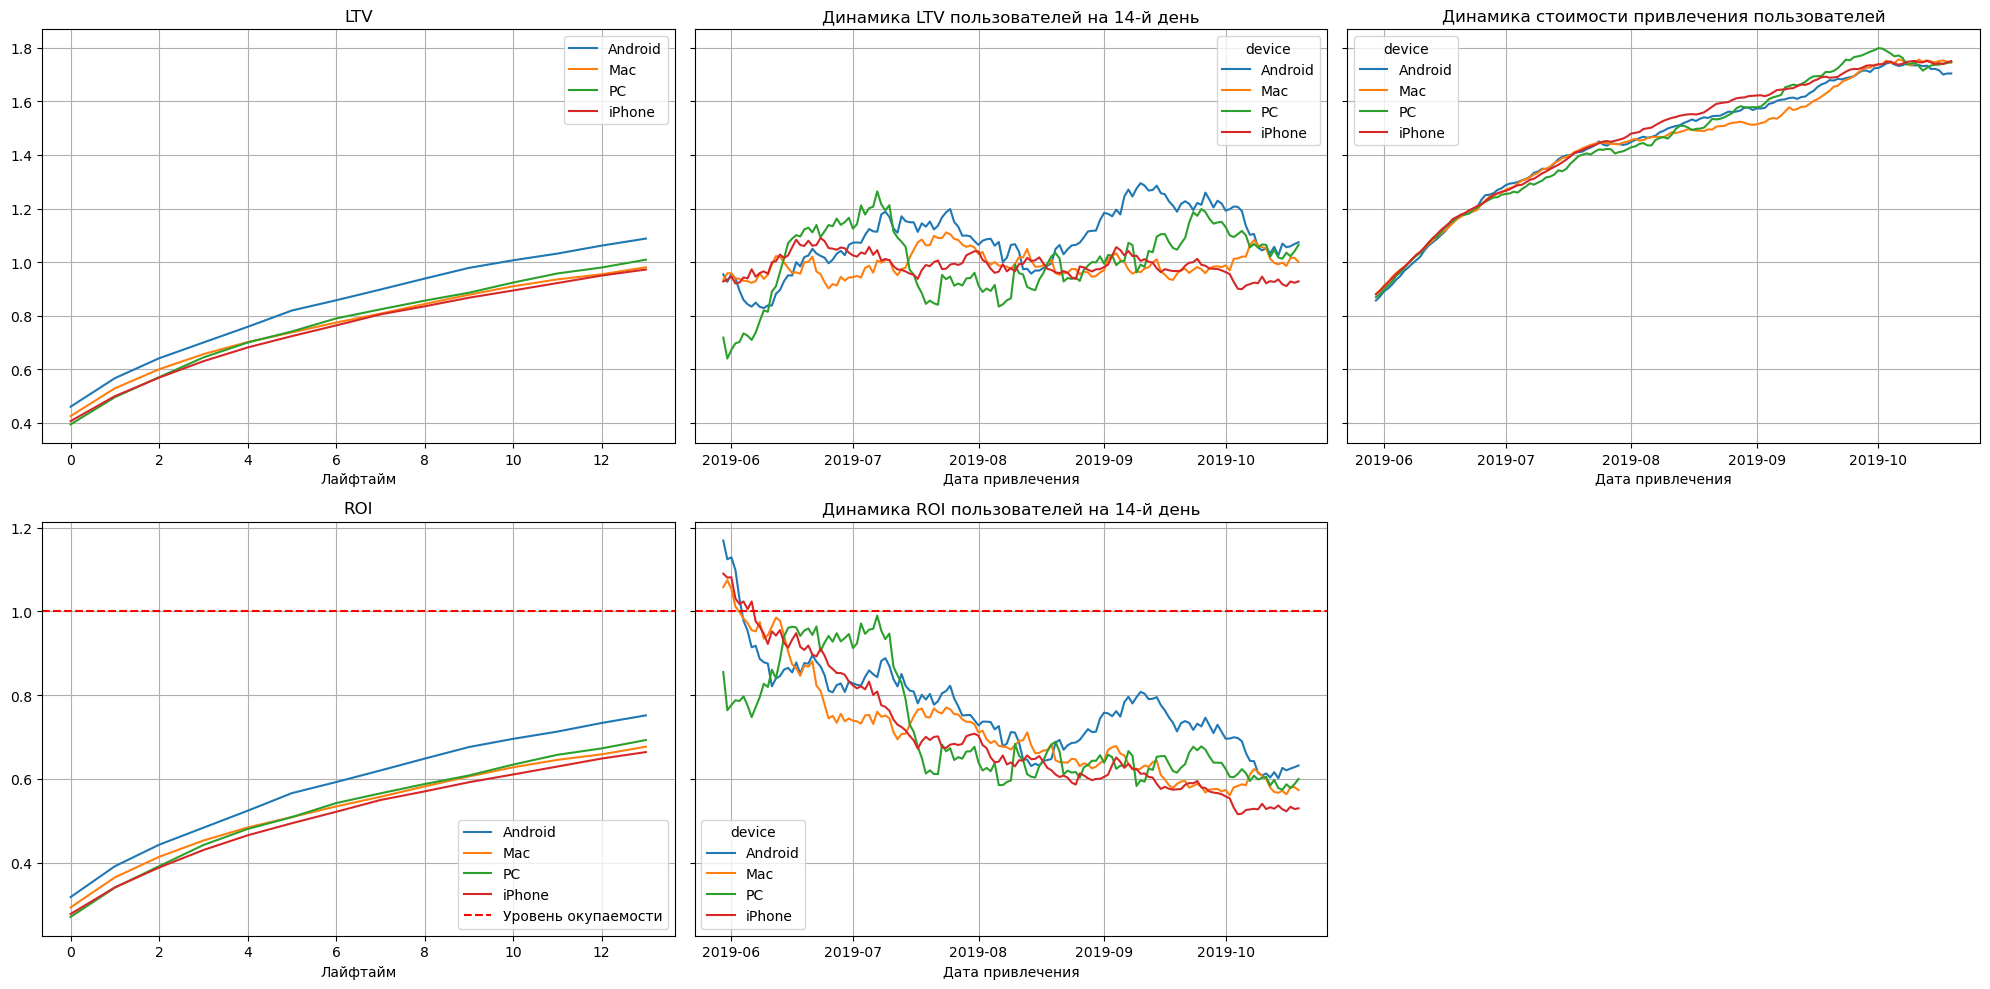

In [73]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=30)

1. LTV > 1 только у Android, остальные - меньше.
2. Динамика LTV стабильная.
3. Стоимость привлечения для всех устройств постоянно растет!!!
4. Никто не окупается. ROI в 2 раза ниже уровня окупаемости.
5. Динамика ROI постоянно снижается!!!

In [74]:
# Группировка по маркетинговым каналам:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles.usa,orders,observation_date,horizon_days, dimensions=['channel']
)

In [ ]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=30)

1. LTV > 1 только у TipTop, остальные - ниже.
2. Динамика LTV у всех ~ стабильна
3. Динамика стоимости привлечения у TipTop постоянно и сильно растет, у Rocket - немного снижается, остальные - стабильна.
4. У YRabbit, MediaTornado и Rocket - окупаемость > 2, а вот FaceBoom и TipTop - не окупаются
5. Динамика окупаемости у MediaTornado и Rocket немного растет, у YRabbit снижается, но все 3 на 1м уровне. У FaceBoom и TipTop динамика стабильна(плохая)

#### Посмотрим отдельно на Европу:

In [ ]:
profiles.europe = profiles.query('region != "United States"')

In [ ]:
# Группировка по устройствам пользователей:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles.europe,orders,observation_date,horizon_days, dimensions=['device']
)

In [ ]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=30)

1. LTV у всех ниже 0.8. При этом у PC чуть лучше остальных.
2. Динамика LTV у всех ~ стабильна
3. Динамика стоимости привлечения пользователей одинаковая и стабильная.
4. Все окупаются с ROI ~ 1.5 , PC - чуть лучше с ROI ~ 1.65
5. Динамика ROI ~ стабильна

In [ ]:
# Группировка по маркетинговым каналам:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles.europe,orders,observation_date,horizon_days, dimensions=['channel']
)

In [ ]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=30)

1. Лучший LTV у lambdaMedia 1.75, WahooNet и AdNonSense - чуть меньше 1, LeapBob и OppleCreative - ниже 0.5.
2. Динамика LTV у всех ~ стабильная
3. Динамика стоимости привлечения также стабильная, при этом **У AdNonSense CAC > 1**, в т овремя как у lambdaMedia он < 0.75
4. Все кроме AdNonSense окупаются. Лучшие: lambdaMedia и LeapBob ~2.3 , 2ое место делят: OppleCreative и WahooNet ~1.5
5. Динамика ROI у всех ~ стабильна.

### 5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,orders,observation_date,horizon_days, dimensions=['channel']
)

In [ ]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14, window=45)

#### Вывод:
1. LTV TipTop и lambdaMediaAds ростут ощутимее остальных, также неплохую динамику показывают RocketSuperAds и WahooNetBanner
2. При этом ROI 2х последних - вышу уровня окупаемости, в отличие от TipTop, FaceBoom и AdNonSense. Остальные тоже в +
3. Динамика LTV у всех более-менее стабильна стабильном уровне.
4. А вот динамика ROI у YRabbit и TipTop снижается.
5. Расходы на привлечение через TipTop постоянно и резко растут. А вот расходы на RocketSuperAds снижаются.

### 5.6 Выводы: 

1. Реклама в целом НЕ окупается.
2. Негативное влияние оказывают:
    - из США:  каналы TipTop и FaceBoom
    - из Европы: канал AdNonSense
3. Проблемы окупаемости могут быть вызваны:
    - Очень низкой конверсией в Европе
    - Очень низким удержанием в США
    - Постоянным и сильным ростом CAC канала TipTop
    - Низким LTV канала FaceBoom
    - CAC стабильно привышающим LTV у AdNonSense

## 6.Общий вывод и рекомендации:

#### Причины плохой окупаемости: 

1. Очень низкая конверсия в Европе
2. Очень низкий пок-ль удержания в США
3. Пролемные каналы с плохой окупаемостью:
    - TipTop с постоянным и сильным ростом CAC (США)
    - FaceBoom с низким LTV (США)
    - AdNonSense с CAC стабильно привышающим LTV (Европа)
    
Какой-либо зависимости плохой окупаемости от типа устройства не выявлено.

#### Рекомендации: 
1. В США отказаться от рекламы с каналов Faceboom и TipTop. Этот бюджет можно сэкономить и частично перераспределить на:
    - RocketSuperAds CR:7.9%  RR:22%  ROI 2.3, как лучший канал по савокупности пок-лей CR RR и ROI
    

2. В Европе отказаться от рекламы в AdNonSense. Этот бюджет лучше перераспределить на:
    - lambdaMedia CR:10.5%  RR:19%  ROI 2.4, как лучший канал по савокупности пок-лей CR RR и ROI
    

3. Основная доля траффика - органика. При этом в США и Европе конверсия пользователей ~ 14%, а удержание 1-2%.
    - Важно начать работать над их удержанием.

